In [1]:
import pybullet as p
import csv
import pandas as pd
import pybullet_data
import time, math, random
import numpy as np
import matplotlib.pyplot as plt
p.connect(p.GUI)
p.setAdditionalSearchPath(pybullet_data.getDataPath())

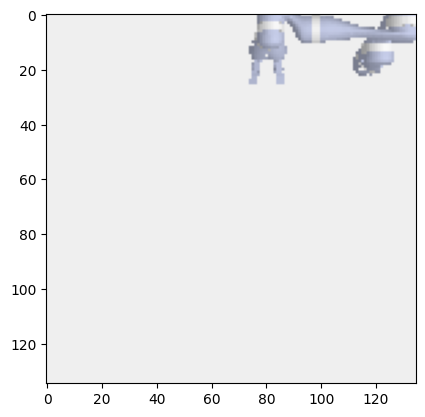

In [2]:
p.resetSimulation()
kinova = p.loadURDF('urdf/j2s6s300.urdf',
                         basePosition=[0,0,0],
                         baseOrientation=[0,0,0,1],
                         globalScaling=1.0)

homePos = [math.pi, math.pi, math.pi/2, math.pi, math.pi/2, math.pi]
for i in range(6):
    p.resetJointState(kinova, i+2, homePos[i])
    p.changeDynamics(kinova, i+9, lateralFriction = 1, spinningFriction=1.0,
                             rollingFriction=0.0001, frictionAnchor=True)
    
p.changeDynamics(kinova, 2, jointLowerLimit = -10*math.pi, jointUpperLimit = 10*math.pi)
p.changeDynamics(kinova, 3, jointLowerLimit = 0.5*math.pi, jointUpperLimit = 1.5*math.pi)
table = p.loadURDF('urdf/table.urdf', basePosition=[0.5, 0.5, -0.65])
table2 = p.loadURDF('urdf/table.urdf', basePosition=[0.5, -0.5, -0.65])
wall = p.createCollisionShape(p.GEOM_BOX, halfExtents = [0.7, 0.05, 0.4])
barrier = p.createMultiBody(baseMass = 100, baseCollisionShapeIndex=wall, basePosition=[0.5, -0.35, 0.4])
home_pos = [1, -0.6, 0.5]
ball = p.createCollisionShape(p.GEOM_SPHERE, radius=0.03)
red=p.createVisualShape(p.GEOM_BOX, halfExtents=[0.03, 0.03, 0.03], rgbaColor = [1, 0, 0, 1])
blue=p.createVisualShape(p.GEOM_BOX, halfExtents=[0.03, 0.03, 0.03], rgbaColor = [0, 0, 1, 1])
box = p.createCollisionShape(p.GEOM_BOX, halfExtents=[0.03, 0.03, 0.03])
platform = p.createCollisionShape(p.GEOM_BOX, halfExtents = [0.5, 1, 0.15])
#platform = p.createMultiBody(baseCollisionShapeIndex = platform, basePosition = [0.78, 0, 0.15])
box1 = p.createMultiBody(baseMass = 0.5,baseCollisionShapeIndex = box, baseVisualShapeIndex = red, basePosition=home_pos)
box2 = p.createMultiBody(baseMass = 0.5,baseCollisionShapeIndex = box, baseVisualShapeIndex = blue, basePosition=home_pos)
#box3 = p.createMultiBody(baseMass = 0.5,baseCollisionShapeIndex = box, basePosition=[0.3, -0.3, 0.1])

p.changeDynamics(box1, -1, lateralFriction = 1, spinningFriction=1, rollingFriction=0.0001, frictionAnchor=True)
p.changeDynamics(box2, -1, lateralFriction = 1, spinningFriction=1, rollingFriction=0.0001, frictionAnchor=True)
#p.changeDynamics(box3, -1, lateralFriction = 1, spinningFriction=1, rollingFriction=0.0001, frictionAnchor=True)


p.setGravity(0, 0, -9.81)
p.resetDebugVisualizerCamera(cameraDistance=1.5, cameraYaw=0, cameraPitch=-40, cameraTargetPosition=[0.55,-0.35,0.2])
duck = p.loadURDF('duck_vhacd.urdf',
                         basePosition=home_pos,
                         baseOrientation=[0,0,0,1],
                         globalScaling=1)
mug = p.loadURDF('urdf/mug.urdf',
                         basePosition=home_pos,
                         baseOrientation=[0,0,0,1],
                         globalScaling=0.8)
sball = p.loadURDF('soccerball.urdf',
                         basePosition=home_pos,
                         baseOrientation=[0,0,0,1],
                         globalScaling=0.09)
ted = p.loadURDF('teddy_vhacd.urdf',
                         basePosition=home_pos,
                         baseOrientation=[0,0,0,1],
                         globalScaling=1.2)
lego = p.loadURDF('urdf/lego.urdf',
                         basePosition=home_pos,
                         baseOrientation=[0,0,0,1],
                         globalScaling=2.7)
bowl = p.loadURDF('urdf/bowl.urdf',
                         basePosition=home_pos,
                         baseOrientation=[0,0,0,1],
                         globalScaling=0.7)

p.changeDynamics(mug, -1, mass = 0.5, lateralFriction = 1, spinningFriction=1, rollingFriction=0.0001, frictionAnchor=True)
p.changeDynamics(duck, -1, lateralFriction = 1, spinningFriction=1, rollingFriction=0.0001, frictionAnchor=True)
p.changeDynamics(sball, -1, mass = 0.5, lateralFriction = 1, spinningFriction=1, rollingFriction=0.0001, frictionAnchor=True)
p.changeDynamics(ted, -1, mass = 0.5, lateralFriction = 1, spinningFriction=1, rollingFriction=0.0001, frictionAnchor=True)
p.changeDynamics(lego, -1, mass = 0.5, lateralFriction = 1, spinningFriction=1, rollingFriction=0.0001, frictionAnchor=True)
p.changeDynamics(bowl, -1, mass = 0.2, lateralFriction = 1, spinningFriction=1, rollingFriction=0.0001, frictionAnchor=True)
p.setRealTimeSimulation(1)
def set_camera():
    view_mtx = p.computeViewMatrixFromYawPitchRoll([0.4, 0.4, 0], 3, 180, -90, 0, 2)
    proj_mtx = p.computeProjectionMatrixFOV(21, 1, 0.06, 10)
    img = p.getCameraImage(135, 135, view_mtx, proj_mtx)
    return img[2]
plt.imshow(set_camera())

In [3]:
images = []
xycoords = []
objects = [duck, box1, box2, mug, sball, ted, lego, bowl]
xmin, xmax = 0.1, 0.9
ymin, ymax = 0.1, 0.9
trials = 12000

In [4]:
start = time.time()
for i in range(trials):
    x = random.uniform(xmin, xmax)
    y = random.uniform(ymin, ymax)
    obj = random.randint(0, 7)
    p.resetBasePositionAndOrientation(objects[obj], [x, y, 0.02], p.getQuaternionFromEuler([0.5*math.pi if obj == 0 else 0, 0, 0]))
    img = set_camera()
    xycoords.append([x, y])
    images.append(img)
    p.resetBasePositionAndOrientation(objects[obj], home_pos, p.getQuaternionFromEuler([0, 0, 0]))
print(time.time()-start)

631.2463383674622


In [5]:
print(np.array(images).shape, np.array(xycoords).shape)

(12000, 135, 135, 4) (12000, 2)


In [8]:
split = int(0.85*len(images))
np.save("cnn/dataset/train_images", np.array(images[:split]))
np.save("cnn/dataset/test_images", np.array(images[split:]))
np.save("cnn/dataset/train_targets", np.array(xycoords[:split]))
np.save("cnn/dataset/test_targets", np.array(xycoords[split:]))